In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터 불러오기
### 연결데이터와 별도데이터 병합하기

In [66]:
# 데이터 불러오기
consolidated = pd.read_csv('데이터/data/연결기업72.csv', encoding='CP949')
separate = pd.read_csv('데이터/data/별도기업72.csv', encoding='CP949')
kgaap = pd.read_csv('데이터/data/케이갭71.csv', encoding='CP949')


# 연결, 개별, 케이갭 데이터 비교하고 확인
print('<연결>')
print('행렬 수 : ', consolidated.shape)
print('회사 수 : ', consolidated['회사명'].nunique())

print('\n<별도>')
print('행렬 수 : ', separate.shape)
print('회사 수 : ', separate['회사명'].nunique())

print('\n<케이갭>')
print('행렬 수 : ', kgaap.shape)
print('회사 수 : ', kgaap['회사명'].nunique())

<연결>
행렬 수 :  (20947, 75)
회사 수 :  2456

<별도>
행렬 수 :  (20947, 75)
회사 수 :  2456

<케이갭>
행렬 수 :  (20831, 74)
회사 수 :  2388


In [67]:
# 컬럼명에 불필요 문자 제거
consolidated.columns = consolidated.columns.str.replace('(', '')
consolidated.columns = consolidated.columns.str.replace(')', '')
consolidated.columns = consolidated.columns.str.replace('대분류', '')
consolidated.columns = consolidated.columns.str.replace('관계기업투자손익 제외', '')
consolidated.columns = consolidated.columns.str.replace('이자비용', '')
consolidated.columns = consolidated.columns.str.replace('IFRS', '')
consolidated.columns = consolidated.columns.str.replace('연결', '')

separate.columns = separate.columns.str.replace('(', '')
separate.columns = separate.columns.str.replace(')', '')
separate.columns = separate.columns.str.replace('대분류', '')
separate.columns = separate.columns.str.replace('관계기업투자손익 제외', '')
separate.columns = separate.columns.str.replace('이자비용', '')
separate.columns = separate.columns.str.replace('IFRS', '')
separate.columns = separate.columns.str.replace('IFRS', '')


# 컬럼명 변경
consolidated.rename(columns={'통계청 한국표준산업분류 10차': '업종'}, inplace=True)
separate.rename(columns={'통계청 한국표준산업분류 10차': '업종'}, inplace=True)


# 컬럼명 재정렬
consolidated = consolidated[[
       '회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', 
       '총자본증가율', '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율',                                   # 성장성
       '유형자산증가율', '유동자산증가율', '재고자산증가율',                                                                                     # 성장성
       '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율',                           # 안정성
       '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',      # 안정성
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율',                                         # 안정성
       '유동부채비율','단기차입금 대 총차입금비율', '차입금의존도', '차입금비율',                                                                 # 안정성
       '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '총자본투자효율',                                                        # 생산성
       '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율',                                                                            # 생산성
       '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률',                                                               # 수익성
       '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율',                                          # 수익성
       '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율',                                       # 수익성
       '금융손익비율', '매출원가 대 매출액비율', '이자부담률', '지급이자율', '차입금평균이자율',                                                   # 수익성
       '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',                                                                      # 활동성
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률',                                                 # 활동성
       '유형자산회전율'                                                                                                                        # 활동성
       ]]

separate = separate[[
       '회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', 
       '총자본증가율', '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율',                                   # 성장성
       '유형자산증가율', '유동자산증가율', '재고자산증가율',                                                                                     # 성장성
       '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율', '매출채권 대 매입채무비율',                           # 안정성
       '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',      # 안정성
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율',                                         # 안정성
       '유동부채비율','단기차입금 대 총차입금비율', '차입금의존도', '차입금비율',                                                                 # 안정성
       '종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '총자본투자효율',                                                        # 생산성
       '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율',                                                                            # 생산성
       '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률',                                                               # 수익성
       '총자본정상영업이익률', '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율',                                          # 수익성
       '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율',                                       # 수익성
       '금융손익비율', '매출원가 대 매출액비율', '이자부담률', '지급이자율', '차입금평균이자율',                                                   # 수익성
       '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',                                                                      # 활동성
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률',                                                 # 활동성
       '유형자산회전율'                                                                                                                        # 활동성
       ]]


consolidated2 = consolidated.copy()

# 연결기업 데이터프레임의 결측치를 개별기업 데이터로 대체
for i in consolidated2.columns:
    consolidated2[i] = consolidated2[i].fillna(separate[i])


# 재무비율이 NaN 값인 것들의 인덱스 리스트 생성
index_to_drop = consolidated2.index[consolidated2.iloc[:, 6:].isna().all(1)].tolist()


# 재무비율이 NaN인 행 제거
consolidated2.drop(consolidated2.index[index_to_drop], inplace=True)
consolidated2.reset_index(drop=True, inplace=True)


# '사업시설 관리, 사업 지원 및 임대 서비스업'을 '임대업'으로 이름 변경
consolidated2['업종'] = consolidated2['업종'].str.replace('사업시설 관리, 사업 지원 및 임대 서비스업', '임대업')


# 데이터 프레임 저장
consolidated2.to_csv('데이터/1차 전처리/연결별도_72피처병합.csv', encoding='CP949', index=False)

<ipython-input-67-81ead89be098>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  consolidated.columns = consolidated.columns.str.replace('(', '')
<ipython-input-67-81ead89be098>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  consolidated.columns = consolidated.columns.str.replace(')', '')
<ipython-input-67-81ead89be098>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  separate.columns = separate.columns.str.replace('(', '')
<ipython-input-67-81ead89be098>:11: FutureWarning: The default value of regex will change from Tru

## 전처리 전 결측치 시각화

<AxesSubplot:>

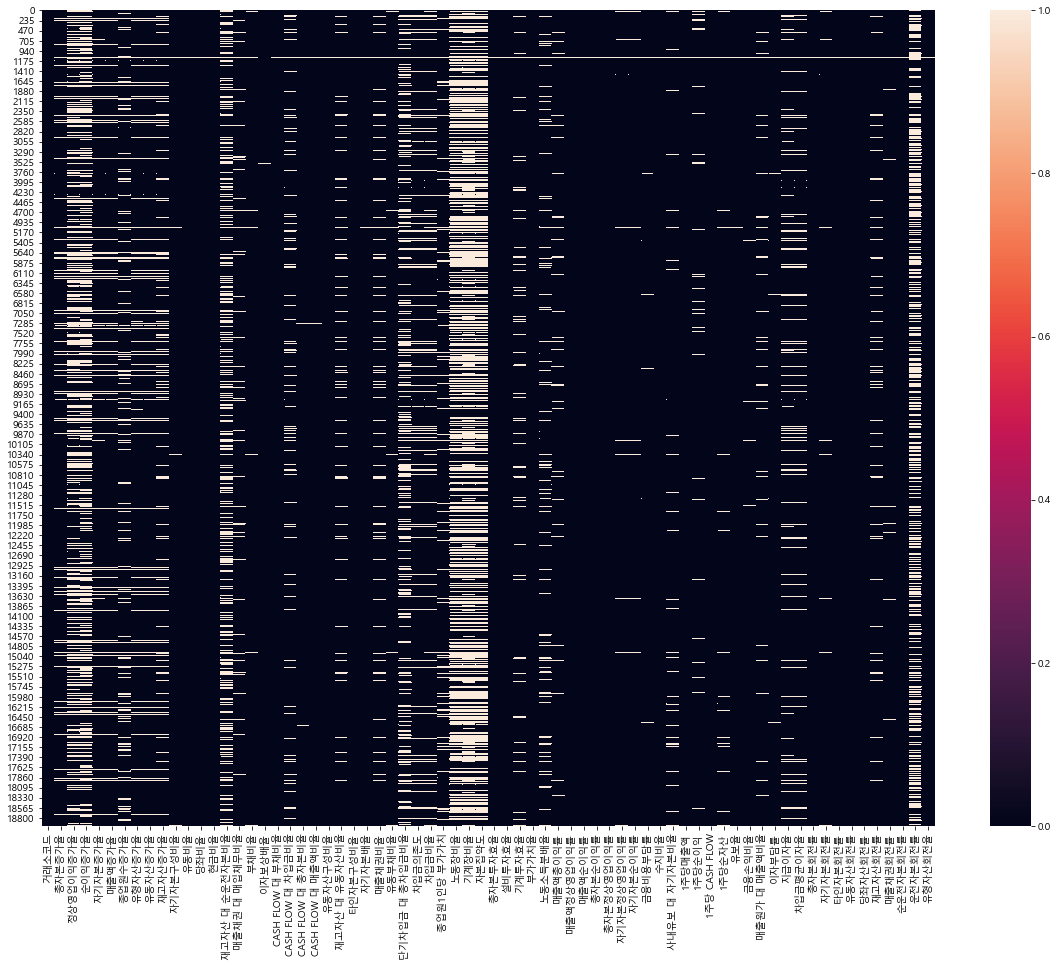

In [68]:
view = consolidated2.copy()

# 시각화할 컬럼만 새로운 변수로 지정
view = view[['거래소코드','총자본증가율', '정상영업이익증가율',
       '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율',
       '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율']]

# 자료 상 0 값을 모두 NaN 으로 변환
view = view.replace(0, np.NaN)


# 결측치 히트맵
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20, 15))

sns.heatmap(view.isna())

## 결측치 및 이상치 처리

In [69]:
df = consolidated2.copy()

# 컬럼 재정렬
df = df[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', '총자본증가율',
       '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율',
       '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율']]

### 회계년도가 12월이 아닌 행 전처리(제거)

In [70]:
df2 = df.copy()

# 회계년도가 12월이 아닌 행 리스트 생성
not_dec_list = df2[~df2.loc[:,'회계년도'].str.endswith('12')].index.tolist()


# 회계년도가 12월이 아닌 행 제거
print('제거 전 : ', df2.shape)

df2.drop(df2.index[not_dec_list], inplace=True)
df2.reset_index(drop=True, inplace=True)
print('제거 후 : ', df2.shape)

제거 전 :  (18985, 75)
제거 후 :  (18838, 75)


### 이자보상배율 결측치 및 이상치 전처리(대체)

In [71]:
df3 = df2.copy()

# 이자보상배율이 NaN인 기업
nan_icr_list = df3['회사명'][df3['이자보상배율'].isna()].index


# 이자보상배율이 NaN인 행 제거
df3.drop(df3.index[nan_icr_list], inplace=True)
df3.reset_index(drop=True, inplace=True)


# 이자보상배율이 999999999인 것을 해당 기업의 평균 이자보상배율 값으로 대체
df3.loc[df3['이자보상배율']==999999999, '이자보상배율'] = np.nan
df3['이자보상배율'] = df3['이자보상배율'].fillna(df3.groupby('회사명')['이자보상배율'].transform('mean'))
print('이자보상배율 전처리 후 : ', df3.shape)

이자보상배율 전처리 후 :  (18838, 75)


### 거래소코드 전처리

In [72]:
# 거래소 코드 6자리가 아닌 것들은 6자리가 될 때까지 앞에 0 추가
df3['거래소코드'] = df3['거래소코드'].astype(str).str.zfill(6)

### 기술성장기업 전처리(제거)

In [73]:
df4 = df3.copy()

# 기술성장기업 불러오기
tg_df = pd.read_csv('데이터/data/기술성장기업list.csv', encoding='CP949')


# 종목코드가 6자리가 아닌 것들 앞에 0추가
tg_df['종목코드'] = tg_df['종목코드'].astype(str).str.zfill(6)


# 제거해야할 기술성장기업 종목코드 리스트
tg_code_list = tg_df['종목코드'].unique().tolist()


# 기술성장기업의 코드와 겹치는 행 제거
df4 = df4.drop(df4[df4['거래소코드'].isin(tg_code_list)].index)
df4.reset_index(drop=True, inplace=True)
print('기술성장기업의 코드와 겹치는 행 제거 : ', df4.shape) 


# (주)큐리언트 제거
company_drop_list = ['(주)큐리언트']
df4.drop(df4[df4['회사명'].isin(company_drop_list)].index, inplace=True)
df4.reset_index(drop=True, inplace=True)
print('(주)큐리언트 제거 : ', df4.shape)


# (주)카이노스메드 제거
df4.drop(df4[df4['회사명']=='(주)카이노스메드'].index, inplace=True)
df4.reset_index(drop=True, inplace=True)
print('(주)카이노스메드 제거 : ', df4.shape)

기술성장기업의 코드와 겹치는 행 제거 :  (18215, 75)
(주)큐리언트 제거 :  (18209, 75)
(주)카이노스메드 제거 :  (18205, 75)


### 거래소코드 9로 시작하는 기업 전처리(제거)

In [74]:
df5 = df4.copy()

# 거래소코드가 9로 시작하는 기업
code_nine_list = df5['회사명'][df5['거래소코드'].astype(str).str.startswith('9')].unique()


# 거래소코드가 9로 시작하는 기업 제거
df5 = df5[~df5['회사명'].isin(code_nine_list)]
df5.reset_index(drop=True, inplace=True)
print('거래소코드가 9로 시작하는 기업 제거 : ', df5.shape)

거래소코드가 9로 시작하는 기업 제거 :  (18070, 75)


### 제무재표 기록이 하나인 기업 전처리(제거)

In [75]:
df6 = df5.copy()

# 기업 기록이 하나인 기업
single_rows = df6['회사명'].value_counts() < 2

# 기업 기록이 하나인 기업 제거
df6 = df6[~df6['회사명'].isin(single_rows[single_rows].index)]
df6.reset_index(drop=True, inplace=True)
print('기업 기록이 하나인 기업 제거 : ', df6.shape)

기업 기록이 하나인 기업 제거 :  (17968, 75)


### 회사명은 하난데 거래소코드가 두개 이상인 회사 전처리(제거)

In [76]:
df7 = df6.copy()

# 회사명은 하난데 거래소코드가 두개 이상인 회사
dup_comp = df7.groupby('회사명')['거래소코드'].nunique() > 1
dup_comp[dup_comp].index.values


# 삭제
company_drop_list = ['(주)본느', '(주)세화피앤씨', '(주)신성이엔지', '(주)아이엘사이언스', '(주)알로이스', '(주)인산가',
       '(주)정다운', '(주)티에스트릴리온', '(주)포인트엔지니어링', '(주)한국비엔씨', '삼성물산(주)',
       '씨아이에스(주)', '에스케이(주)', '엠에프엠코리아(주)', '줌인터넷(주)', '패션플랫폼(주)']
df7.drop(df7[df7['회사명'].isin(company_drop_list)].index, inplace=True)
df7.reset_index(drop=True, inplace=True)
print('회사명은 하난데 거래소코드가 두개 이상인 회사 제거 : ', df7.shape)

회사명은 하난데 거래소코드가 두개 이상인 회사 제거 :  (17856, 75)


### 거래소코드는 하난데 회사명이 두개 이상인 거래소코드 전처리(제거)

In [77]:
df8 = df7.copy()

# 거래소코드는 하난데 회사명이 두개 이상인 거래소코드
dup_code = df8.groupby('거래소코드')['회사명'].nunique() > 1
dup_code[dup_code].index.values


# 제이콘텐트리와 콘텐트리중앙이 겹치기 때문에 제이콘텐트리 제거
df8.drop(df8[df8['회사명']=='(주)제이콘텐트리'].index, inplace=True)
df8.reset_index(drop=True, inplace=True)
print('거래소코드는 하난데 회사명이 두개 이상인 거래소코드 제거 : ', df8.shape)

거래소코드는 하난데 회사명이 두개 이상인 거래소코드 제거 :  (17848, 75)


### 상장일이 두개인데 상장폐지일이 있는 기업 전처리(제거)

In [78]:
df9 = df8.copy()

# 상장일이 두개 이상인 기업
dup_listdate = df9.groupby(['회사명','거래소코드'])['상장일'].nunique().reset_index()
dup_listdate[dup_listdate['상장일']>1]


# 상장일이 두개 이상인 기업 리스트
dup_listdate_company = dup_listdate['회사명'][dup_listdate['상장일']>1]


# 상장일이 두개 이상인데 상장폐지일이 있는 행 삭제
df9.drop(df9[df9['회사명'].isin(dup_listdate_company) & df9['상장폐지일'].notnull()].index, inplace=True)
df9.reset_index(drop=True, inplace=True)
df9[df9['회사명'].isin(dup_listdate_company) & df9['상장폐지일'].notnull()]
print('상장일이 두개 이상인데 상장폐지일이 있는 행 삭제 제거 : ', df9.shape)

상장일이 두개 이상인데 상장폐지일이 있는 행 삭제 제거 :  (17805, 75)


### 회계년도가 상장일 보다 빠른 기업 전처리(제거)

In [79]:
df10 = df9.copy()

# 회계년도, 상장일 포멧 변경
df10['회계년도'] = pd.to_datetime(df10['회계년도'], format='%Y/%m')
df10['회계년도'] = df10['회계년도'].dt.strftime('%Y%m')

df10['상장일'] = pd.to_datetime(df10['상장일'], format='%Y/%m')
df10['상장일'] = df10['상장일'].dt.strftime('%Y%m')


# 회계년도가 상장일 보다 빠른 기업 제거
df10.drop(df10[df10['회계년도'] < df10['상장일']].index, inplace=True)
df10.reset_index(drop=True, inplace=True)
print('회계년도가 상장일 보다 빠른 기업 제거 : ', df10.shape)


# 아인스엔앰엔, 에피밸리 제거
company_drop_list = ['아인스엔앰엔', '에피밸리']
df10.drop(df10[df10['회사명'].isin(company_drop_list)].index, inplace=True)
df10.reset_index(drop=True, inplace=True)
print('아인스엔앰엔, 에피밸리 제거 : ', df10.shape)


# (주)카이노스메드 제거
df10.drop(df10[df10['회사명']=='(주)카이노스메드'].index, inplace=True)
df10.reset_index(drop=True, inplace=True)
print('(주)카이노스메드 제거 : ', df10.shape)


# 체크포인트
df10.to_csv('데이터/정리용/전처리part1.csv', encoding='CP949', index=False)


회계년도가 상장일 보다 빠른 기업 제거 :  (16748, 75)
아인스엔앰엔, 에피밸리 제거 :  (16748, 75)
(주)카이노스메드 제거 :  (16748, 75)


## TS대체값 Merge

In [86]:
# 전처리part1 불러오기
df = pd.read_csv('데이터/정리용/전처리part1.csv', encoding='CP949')

# 파생변수 1차 불러오기
first = pd.read_csv('데이터/정리용/파생변수merge_1차.csv', encoding='CP949')
growth = pd.read_csv('데이터/정리용/파생변수merge_성장성.csv', encoding='CP949')


# 연결, 개별, 케이갭 데이터 비교하고 확인
print('<전처리part1>')
print('행렬 수 : ', df.shape)
print('회사 수 : ', df['회사명'].nunique())

print('\n<파생변수merge_1차>')
print('행렬 수 : ', first.shape)
print('회사 수 : ', first['회사명'].nunique())

print('\n<파생변수merge_성장성>')
print('행렬 수 : ', growth.shape)
print('회사 수 : ', growth['회사명'].nunique())

<전처리part1>
행렬 수 :  (16748, 75)
회사 수 :  2041

<파생변수merge_1차>
행렬 수 :  (16748, 81)
회사 수 :  2041

<파생변수merge_성장성>
행렬 수 :  (16748, 80)
회사 수 :  2041


In [87]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', '총자본증가율', '정상영업이익증가율',
       '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율',
       '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율'],
      dtype='object')

In [99]:
# 컬럼 재정렬
df = df[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종', '총자본증가율', '정상영업이익증가율',
       '순이익증가율', '자기자본증가율', '매출액증가율', '종업원수증가율', '유형자산증가율', '유동자산증가율',
       '재고자산증가율', '자기자본구성비율', '유동비율', '당좌비율', '현금비율', '재고자산 대 순운전자본비율',
       '매출채권 대 매입채무비율', '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율',
       'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율',
       '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율', '매출채권비율', '유동부채비율',
       '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '종업원1인당 부가가치', '노동장비율', '기계장비율',
       '자본집약도', '총자본투자효율', '설비투자효율', '기계투자효율', '부가가치율', '노동소득분배율', '매출액총이익률',
       '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률', '자기자본정상영업이익률',
       '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', '1주당순이익',
       '1주당 CASH FLOW', '1주당순자산', '유보율', '금융손익비율', '매출원가 대 매출액비율', '이자부담률',
       '지급이자율', '차입금평균이자율', '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률',
       '당좌자산회전률', '재고자산회전률', '매출채권회전률', '순운전자본회전률', '운전자본회전률', '유형자산회전율'
       ]]


df_part2 = df.copy()

# 파생변수 추가하기
df_part2[['종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '자기자본구성비율_계산',
       '재고자산대순운전자본비율_계산']] = first[['종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '자기자본구성비율_계산',
       '재고자산대순운전자본비율_계산']] 
df_part2[['총자산증가율_계산', '자기자본증가율_계산', '정상영업손익증가율_계산', '순이익증가율_계산', '매출액증가율_계산']] = growth[['총자산증가율_계산', 
       '자기자본증가율_계산', '정상영업손익증가율_계산', '순이익증가율_계산', '매출액증가율_계산']]

df_part2_copy = df_part2.copy()


# 칼럼 삭제
df_part2_copy.drop(columns=['종업원1인당 부가가치', '노동장비율', '기계장비율', '자본집약도', '자기자본구성비율', '재고자산 대 순운전자본비율',
       '총자본증가율', '정상영업이익증가율', '순이익증가율', '자기자본증가율', '매출액증가율',
       '유형자산증가율', '유동자산증가율', '재고자산증가율', '유동자산구성비율', '재고자산 대 유동자산비율', '타인자본구성비율', '자기자본배율',
       '매출채권비율', '유동부채비율', '단기차입금 대 총차입금비율', '차입금의존도', '차입금비율', '금융손익비율', '매출원가 대 매출액비율',
       '이자부담률', '지급이자율', '차입금평균이자율', '유형자산회전율'], inplace=True)


# 컬럼 재정렬
df_part2_copy = df_part2_copy[['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '업종',
        '총자산증가율_계산', '정상영업손익증가율_계산', '순이익증가율_계산', '자기자본증가율_계산', '매출액증가율_계산', '종업원수증가율', #성장률
        
        '매출액총이익률', '매출액정상영업이익률', '매출액순이익률', '총자본순이익률', '총자본정상영업이익률',
        '자기자본정상영업이익률', '자기자본순이익률', '금융비용부담률', '수지비율', '사내유보 대 자기자본비율', '1주당매출액', 
        '1주당순이익', '1주당 CASH FLOW', '1주당순자산', '유보율', # 수익성
        
        '자기자본구성비율_계산', '유동비율', '당좌비율', '현금비율', '재고자산대순운전자본비율_계산', '매출채권 대 매입채무비율',
        '부채비율', '이자보상배율', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', #안전성
                
        '종업원1인당부가가치율_계산', '노동장비율_계산', '기계장비율_계산', '자본집약도_계산', '총자본투자효율', '설비투자효율', '기계투자효율',
        '부가가치율', '노동소득분배율', # 생산성 기존
                
        '총자본회전률', '자기자본회전률', '타인자본회전률', '유동자산회전률', '당좌자산회전률', '재고자산회전률', 
        '매출채권회전률', '순운전자본회전률', #활동성기존
        '운전자본회전률']] #활동성 new 컬럼


# 칼럼명 수정
df_part2_copy = df_part2_copy.rename(columns={'총자산증가율_계산' : '총자본증가율_계산'})

# 저장
df_part2_copy.to_csv('데이터/정리용/전처리part2.csv', index=False, encoding='CP949')
